<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionAnalysisLinearRegression/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**

## Import Essesional Library

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
data = yf.download('GC=F', start='2023-12-29', end='2024-12-29')
data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(2)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2023-12-29,2062.399902,2062.399902,2068.899902,2062.100098,2068.0,47
2024-01-02,2064.399902,2064.399902,2073.699951,2057.100098,2063.5,61


## Data Cleaning

In [4]:
def clean_columns(data):
  if 'Date' in data.columns:
      data = data.set_index('Date')
  data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
  data.columns = [col.replace('GC=F', ' ') for col in data.columns]
  if data.index.name == "Date":
      data = data.reset_index()

In [5]:
clean_columns(data)

In [6]:
data.head(2)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-29,2062.399902,2062.399902,2068.899902,2062.100098,2068.0,47
2024-01-02,2064.399902,2064.399902,2073.699951,2057.100098,2063.5,61


In [7]:
data = data.reset_index()

In [8]:
data.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-12-29,2062.399902,2062.399902,2068.899902,2062.100098,2068.0,47
1,2024-01-02,2064.399902,2064.399902,2073.699951,2057.100098,2063.5,61


In [9]:
data.columns

Index(['Date', 'Adj Close  ', 'Close  ', 'High  ', 'Low  ', 'Open  ',
       'Volume  '],
      dtype='object')

In [10]:
Series = data[['Date', 'Close  ']]

In [11]:
Series.head(2)

,Date,Close
0,2023-12-29,2062.399902
1,2024-01-02,2064.399902


In [12]:
Series = Series.rename(columns={'Close  ': 'Close'})

In [13]:
Series

,Date,Close
0,2023-12-29,2062.399902
1,2024-01-02,2064.399902
2,2024-01-03,2034.199951
3,2024-01-04,2042.300049
4,2024-01-05,2042.400024
...,...,...
246,2024-12-20,2628.699951
247,2024-12-23,2612.300049
248,2024-12-24,2620.000000
249,2024-12-26,2638.800049


## Trending Analysis

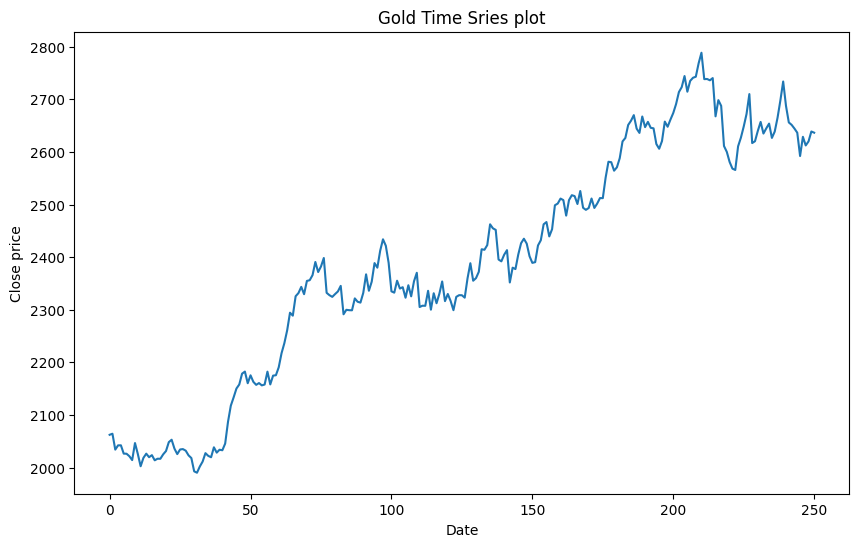

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(Series['Close'])
plt.title('Gold Time Sries plot')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.show()

## Decomposition

In [15]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [16]:
Series['Date'] = pd.to_datetime(Series['Date']).dt.date

In [17]:
Series.columns

Index(['Date', 'Close'], dtype='object')

In [18]:
Series.isna().sum()

,0
Date,0
Close,0


In [19]:
Series.duplicated(subset='Date').sum()

0

In [20]:
Series['Date']

,Date
0,2023-12-29
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
246,2024-12-20
247,2024-12-23
248,2024-12-24
249,2024-12-26


additive
-------------------------------------


<IPython.core.display.Math object>

-----------------------------------


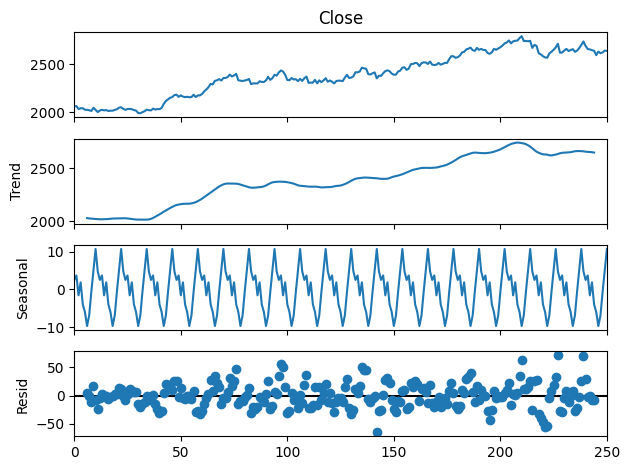

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Math
print('additive')
print('-------------------------------------')
display(Math(r"Y(t) = T(t) + S(t) + R(t)"))
print('-----------------------------------')
decompose_result = seasonal_decompose(Series['Close'], model='additive', period=12)
decompose_result.plot()
plt.show()

## Stationary Test

In [22]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(Series['Close'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -1.08
p-value: 0.72
The series is non-stationary


##  Detrending

### Subtract Trend

In [25]:
from scipy.signal import detrend

Series['Detrended'] = detrend(Series['Close'])

res = adfuller(Series['Detrended'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

ADF Statistic: -2.52
p-value: 0.11
The series is non-stationary


In [27]:
Series['Diff'] = Series['Close'].diff()

res = adfuller(Series['Diff'])

print(f'ADF Statistic: {round(res[0], 2)}')
print(f'p-value: {round(res[1], 2)}')
if res[1] <= 0.05:
    print('The series is stationary')
else:
    print('The series is non-stationary')

MissingDataError: exog contains inf or nans